## Data Science BootCamp Week 3 Take Home
#### Chapter 1, Monday sessions
By Yasamin Esmaeili

In [1]:
#   Importing base libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Loading the dataset

In [2]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

Checking the data:

In [3]:
df.head()
df.info()
df.shape

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


(16057, 12)

### 1. Filtering the data
The goal is to filter the data to only look at weekdays, and show the pedestrian counts using a line graph for those days.

First, we need to create a new column for day name, using the date information.

In [4]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df = df.sort_values(by='hour_beginning') #Arranging data in chronological order first and then proceeding to forward/back fill
df['day_name'] = df['hour_beginning'].dt.day_name()
df.sample(5)

/var/folders/47/5d_jb47s06lc5_mq38zktwt4hwnn_5/T/ipykernel_12187/1497480848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_name
2347,2019-12-25 20:00:00,Brooklyn Bridge,15,13,2,clear-night,39.0,0.0003,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Wednesday
8206,2019-12-19 11:00:00,Brooklyn Bridge,737,372,365,clear-day,20.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
14865,2018-04-05 02:00:00,Brooklyn Bridge,10,9,1,clear-night,38.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
1955,2019-12-19 05:00:00,Brooklyn Bridge,0,0,0,clear-night,16.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
13644,2018-03-25 11:00:00,Brooklyn Bridge,1615,948,667,partly-cloudy-day,40.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday


To filter the data frame based on weekdays, first we need to create the list of days of interest (week days), and then use the '.isin' attribute to filter the rows of the data frame.

In [5]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_weekdays = df[df['day_name'].isin(weekday_order)].copy()
df_weekdays.sample(5)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_name
5039,2019-03-05 12:00:00,Brooklyn Bridge,1282,543,739,clear-day,28.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
11429,2018-01-31 02:00:00,Brooklyn Bridge,3,2,1,clear-night,22.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Wednesday
85,2019-07-05 10:00:00,Brooklyn Bridge,1683,981,702,cloudy,77.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday
10167,2018-01-09 23:00:00,Brooklyn Bridge,14,2,12,clear-night,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
13648,2018-05-30 22:00:00,Brooklyn Bridge,261,138,123,partly-cloudy-night,60.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Wednesday


Alternatively, we can use the datetime column to filter the data frame (if day of week is <5, it's a weekday)

In [6]:
df_weekdays = df[df['hour_beginning'].dt.dayofweek < 5]
df_weekdays.sample(5)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_name
14225,2018-02-20 04:00:00,Brooklyn Bridge,4,3,1,cloudy,47.0,0.0016,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4078,2019-10-16 19:00:00,Brooklyn Bridge,92,91,1,rain,61.0,0.2808,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Wednesday
10012,2017-11-27 14:00:00,Brooklyn Bridge,1333,575,758,clear-day,50.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
2163,2019-11-01 09:00:00,Brooklyn Bridge,680,375,305,clear-day,47.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday
7173,2019-02-25 06:00:00,Brooklyn Bridge,38,18,20,partly-cloudy-night,38.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday


Now we need to group the data frame based on the day name, and sum up the pedestrian counts.

In [7]:
df_weekdays.groupby('day_name')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,2280.0,696.521053,845.244195,0.0,17.0,243.5,1318.00,3722.0
Monday,2304.0,642.983941,777.944829,0.0,12.0,232.0,1232.00,3657.0
Thursday,2280.0,601.263158,728.067954,0.0,16.0,214.0,1102.25,3173.0
Tuesday,2328.0,599.210911,731.047235,0.0,14.0,232.5,1122.50,4141.0
Wednesday,2280.0,574.956140,694.807586,0.0,16.0,217.0,1050.00,3807.0


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Brooklyn Bridge total pedestrian count on weekdays')

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Pedestrian Count')

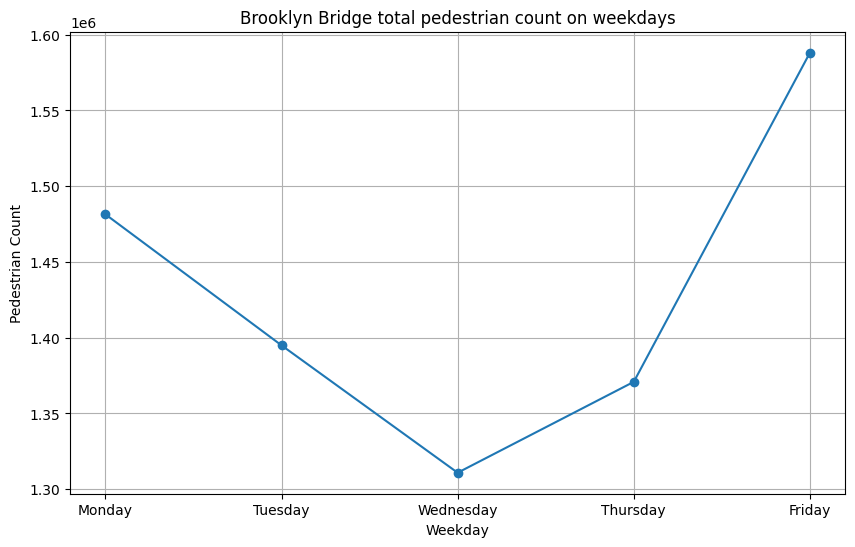

In [8]:
ped_counts_weekday = df_weekdays.groupby('day_name')['Pedestrians'].sum().reindex(weekday_order)
#print(ped_counts_weekday)

# 4) Plot a simple line graph
plt.figure(figsize=(10,6))
plt.plot(ped_counts_weekday.index, ped_counts_weekday.values, marker="o")
plt.title("Brooklyn Bridge total pedestrian count on weekdays")
plt.xlabel("Weekday")
plt.ylabel("Pedestrian Count")
plt.grid(True)
plt.show()

### 2. Relationship between weather condition and pedestrian activity
The goal here is to find any relationship between pedestrian activity and temperature/precipitation in different weather conditions, in data from 2019.

First, we need to filter the data frame for all the entries from 2019.

In [9]:
df_2019 = df[df['hour_beginning'].dt.year == 2019].copy()
df_2019.sample(5)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_name
7214,2019-03-03 12:00:00,Brooklyn Bridge,1878,898,980,partly-cloudy-day,41.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
3333,2019-07-26 07:00:00,Brooklyn Bridge,284,127,157,clear-day,70.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday
469,2019-12-18 22:00:00,Brooklyn Bridge,34,23,11,cloudy,26.0,0.0074,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Wednesday
7406,2019-03-25 17:00:00,Brooklyn Bridge,1105,572,533,cloudy,49.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
7869,2019-02-02 22:00:00,Brooklyn Bridge,0,0,0,clear-night,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Saturday


First, we look at the distribution of the pedestrian counts in different weather conditions:

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='weather_summary'>

Text(0, 0.5, 'Mean pedestrians (2019)')

Text(0.5, 1.0, 'Avg pedestrians by weather (2019)')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'partly-cloudy-day'),
  Text(1, 0, 'clear-day'),
  Text(2, 0, 'wind'),
  Text(3, 0, 'cloudy'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'snow'),
  Text(6, 0, 'fog'),
  Text(7, 0, 'sleet'),
  Text(8, 0, 'partly-cloudy-night'),
  Text(9, 0, 'clear-night')])

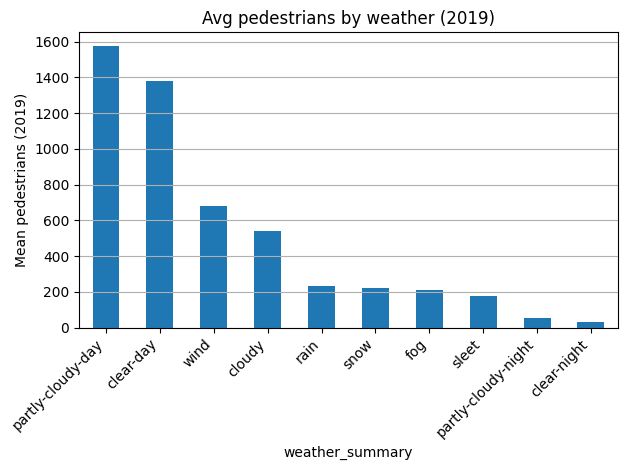

In [10]:
mean_by_weather = (df_2019.groupby('weather_summary', as_index=True)['Pedestrians'].mean().sort_values(ascending=False))

plt.figure()
mean_by_weather.plot(kind='bar')
plt.ylabel('Mean pedestrians (2019)')
plt.title('Avg pedestrians by weather (2019)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This clearly shows, that the least pedestrian counts are during night, and the most are during partly cloudy or clear day. It also shows that even with the daylight , weather condition can change the pedestrian counts drastically. We see a similar pattern even when plotting box-plots.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='weather_summary', ylabel='Pedestrians'>

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Pedestrian Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'rain'),
  Text(1, 0, 'cloudy'),
  Text(2, 0, 'partly-cloudy-night'),
  Text(3, 0, 'partly-cloudy-day'),
  Text(4, 0, 'clear-night'),
  Text(5, 0, 'clear-day'),
  Text(6, 0, 'snow'),
  Text(7, 0, 'sleet'),
  Text(8, 0, 'fog'),
  Text(9, 0, 'wind')])

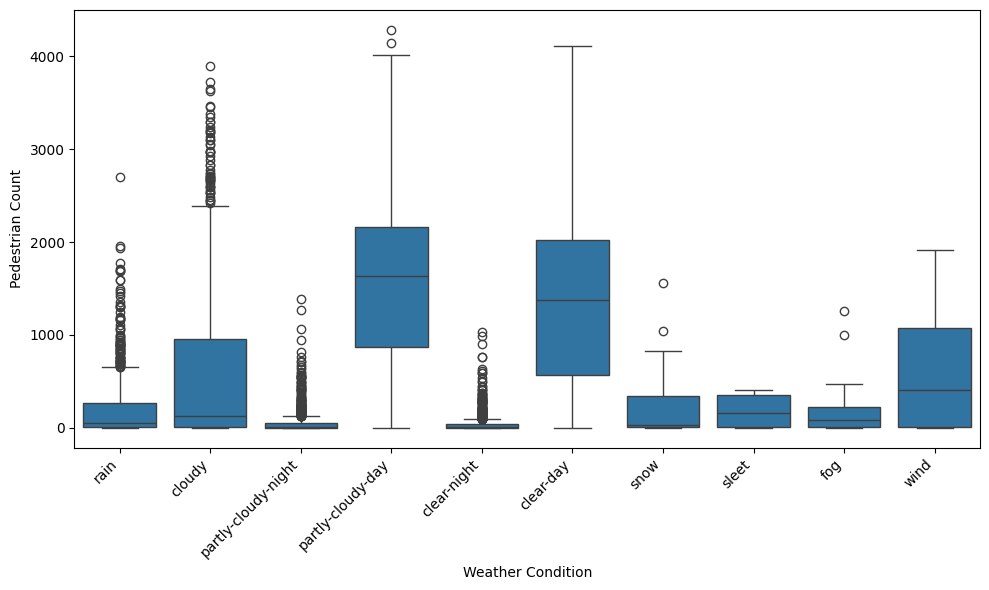

In [11]:
# Generating a scatter plot of weather against pedestrian counts
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2019['weather_summary'], y=df_2019['Pedestrians'])
plt.xlabel('Weather Condition')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  #Prevents overlapping elements
plt.show()

To find the correlation between weather condition and pedestrian counts, we encode each condition with a numerical value, and compute the correlation coefficient of the counts with this new encoded weather condition.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Pedestrians, Temperature, and Precipitation')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Pedestrians'),
  Text(1.5, 0, 'weather_clear-day'),
  Text(2.5, 0, 'weather_clear-night'),
  Text(3.5, 0, 'weather_cloudy'),
  Text(4.5, 0, 'weather_fog'),
  Text(5.5, 0, 'weather_partly-cloudy-day'),
  Text(6.5, 0, 'weather_partly-cloudy-night'),
  Text(7.5, 0, 'weather_rain'),
  Text(8.5, 0, 'weather_sleet'),
  Text(9.5, 0, 'weather_snow'),
  Text(10.5, 0, 'weather_wind')])

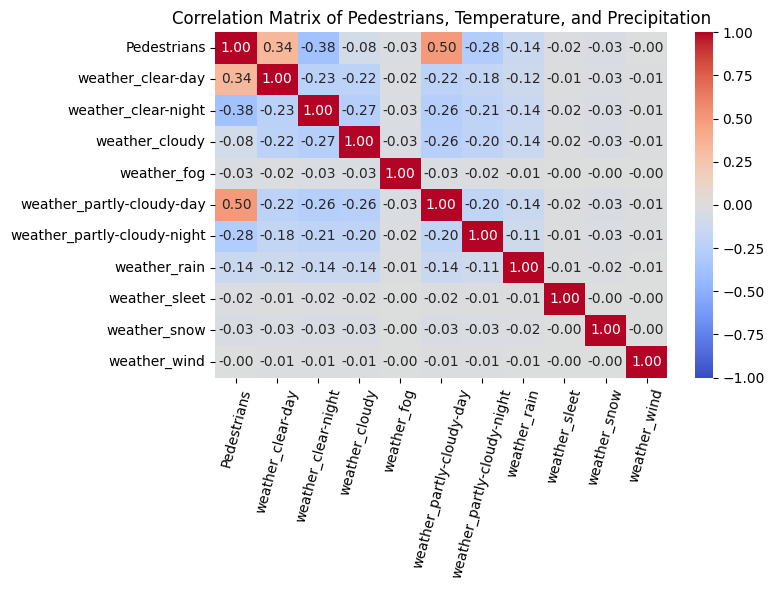

In [15]:
# Convert the weather summary to numerical values for correlation analysis
weather_dummies = pd.get_dummies(df_2019['weather_summary'], prefix='weather')

# Combine the original dataframe with the new dummy variables
df_2019_encoded = pd.concat([df_2019, weather_dummies], axis=1)

correlation_matrix = df_2019_encoded[['Pedestrians'] +list(weather_dummies.columns)].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)    #   Correlation values are always between -1 and 1
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

We limited the colorbar to fall between -1 to 1, so the colors will actually be meaningful. We see that the highest correlation between counts and weather conditions are during partly cloudy, and clear days, exactly the conditions with the highest pedestrian counts.

There's also a negative correlation (i.e. a drop in the pedestrian counts as the specific condition appears) for clear and partly cloudy nights, the conditions that had the least pedestrian counts.

### 3. Pedestrian activity vs. time of the day
In the last part, the goal is first to categorize the time of the day into morning, afternoon, evening, and night, using a custom function. Then, we want to analyze the pedestrian activity pattern throughout the day.

In [16]:
# Custom function to categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:  # This covers hours 22, 23, 0, 1, 2, 3, 4
        return 'Night'

In [17]:
# Create the new 'time_of_day' column
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

df[['hour_beginning', 'time_of_day']].sample(5)

,hour_beginning,time_of_day
12249,2018-03-15 23:00:00,Night
9492,2018-02-02 06:00:00,Morning
8810,2018-01-03 07:00:00,Morning
11994,2018-02-20 20:00:00,Evening
879,2019-06-13 03:00:00,Night


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

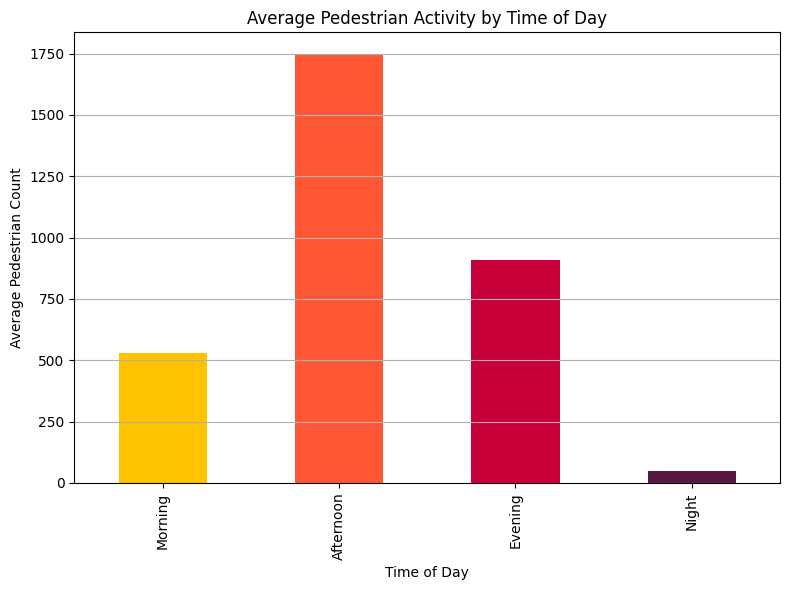

In [18]:
pedestrian_activity = df.groupby('time_of_day')['Pedestrians'].mean()

# Define the order
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Re-index the series to match this order
pedestrian_activity = pedestrian_activity.reindex(time_order)

plt.figure(figsize=(8, 6))
pedestrian_activity.plot(kind='bar', color=['#FFC300', '#FF5733', '#C70039', '#581845'])
plt.title('Average Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Optionally, we can also analyze the pedestrian count in different times of the day, both on weekdays and weekends, separately.

/var/folders/47/5d_jb47s06lc5_mq38zktwt4hwnn_5/T/ipykernel_88657/1855084272.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pedestrian_weekdays = df_weekdays.groupby('time_of_day')['Pedestrians'].mean()
/var/folders/47/5d_jb47s06lc5_mq38zktwt4hwnn_5/T/ipykernel_88657/1855084272.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pedestrian_weekends = df_weekends.groupby('time_of_day')['Pedestrians'].mean()


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

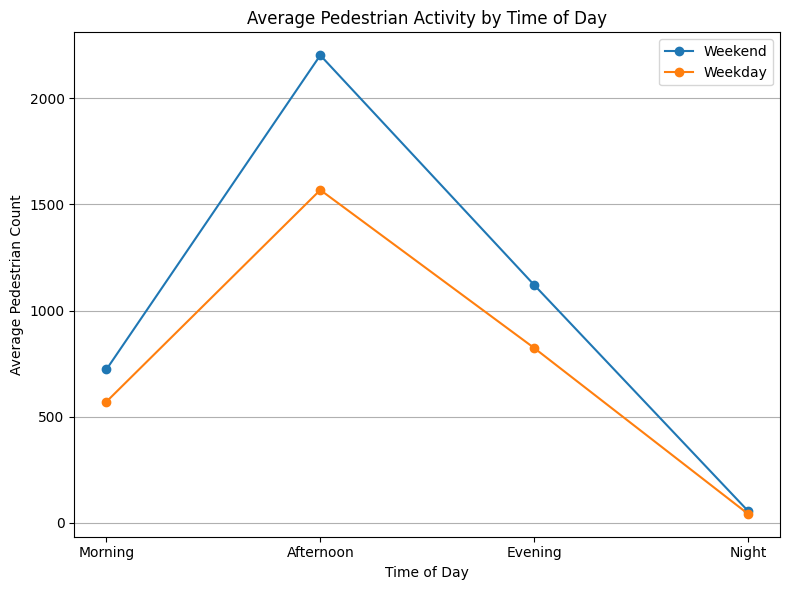

In [62]:
# Weekday vs Weekend patterns by time-of-day 
df_weekdays = df[df['hour_beginning'].dt.dayofweek < 5]
df_weekends = df[df['hour_beginning'].dt.dayofweek > 4]


pedestrian_weekdays = df_weekdays.groupby('time_of_day')['Pedestrians'].mean()
pedestrian_weekends = df_weekends.groupby('time_of_day')['Pedestrians'].mean()

# Re-index the series to match this order
pedestrian_weekdays = pedestrian_weekdays.reindex(time_order)

plt.figure(figsize=(8, 6))
plt.plot(pedestrian_weekends.index, pedestrian_weekends.values, marker="o")
hold =  plt.plot(pedestrian_weekdays.index, pedestrian_weekdays.values, marker="o")
#pedestrian_weekends.plot(kind='bar', color='salmon', alpha=0.7)
#hold = pedestrian_weekdays.plot(kind='bar', color='skyblue', alpha=0.8)
plt.legend(['Weekend', 'Weekday'])
plt.title('Average Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Most activity happens during the afternoon (12 to 4 pm), then evening (5 to 8 pm), and then in the morning (5 to 11 am). This pattern aligns our expectation, as seems to be appearing both in weekends and weekdays, with weekends having a higher average pedestrian counts over the day.